# Simple and Multiple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# Import the data
df = pd.read_csv("datasets/car_price_predictions/car_price.csv")
df.columns = df.columns.str.lower()
df.drop(columns="car_id", inplace=True)
df.head()

,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Shape
df.shape

(205, 25)

In [4]:
# Correlations
df.corr(numeric_only=True)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


# Simple Linear Regression

In [5]:
# Test
X = sm.add_constant(df["enginesize"])
Y = df["price"]

# OLS Model
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     657.6
Date:                Sat, 18 May 2024   Prob (F-statistic):           1.35e-65
Time:                        23:26:12   Log-Likelihood:                -1984.4
No. Observations:                 205   AIC:                             3973.
Df Residuals:                     203   BIC:                             3979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8005.4455    873.221     -9.168      0.0

In [6]:
# 95% Confidence Intervals for beta one
b1 = model.params.loc["enginesize"]
enginesize_se = model.bse.loc["enginesize"]
t_value = 1.971603

lower_bound = b1 - t_value*enginesize_se
upper_bound = b1 + t_value*enginesize_se

print(f"We are 95% confident that beta one is between {round(lower_bound, 3)}, {round(upper_bound, 3)}")

We are 95% confident that beta one is between 154.805, 180.591


In [7]:
# 95% Confidence Intervals for beta zero
b0 = model.params.loc["const"]
intercept_se = model.bse.loc["const"]

lower_bound = b0 - t_value*intercept_se
upper_bound = b0 + t_value*intercept_se

print(f"We are 95% confident that beta one is between {round(lower_bound, 3)}, {round(upper_bound, 3)}")

We are 95% confident that beta one is between -9727.09, -6283.801


In [8]:
# Double check the values with the model
model.conf_int(alpha=0.05)

,0,1
const,-9727.191343,-6283.69972
enginesize,154.804653,180.59218


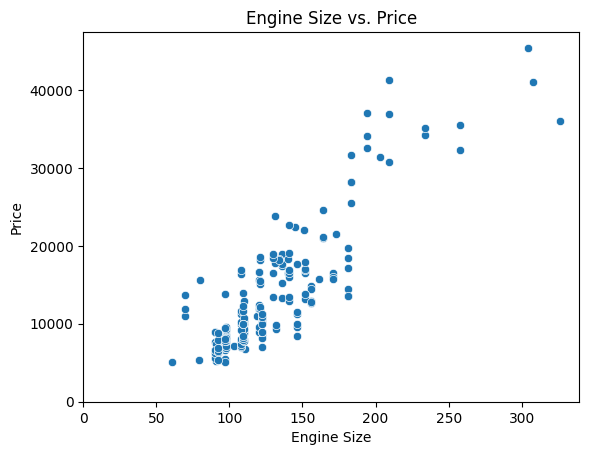

In [9]:
# Plot the relationship
sns.scatterplot(data=df, x="enginesize", y="price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Engine Size vs. Price")
plt.xlim(0)
plt.ylim(0)
plt.show()

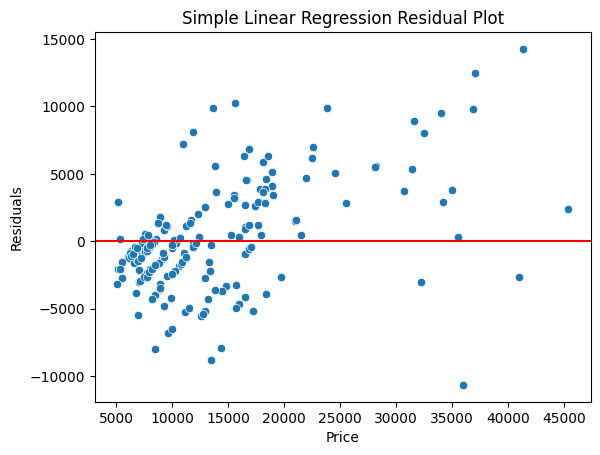

In [10]:
# Plot the residuals
sns.scatterplot(x=df["price"], y=model.resid)
plt.axhline(c='r')
plt.xlabel("Price")
plt.ylabel("Residuals")
plt.title("Simple Linear Regression Residual Plot")
plt.show()

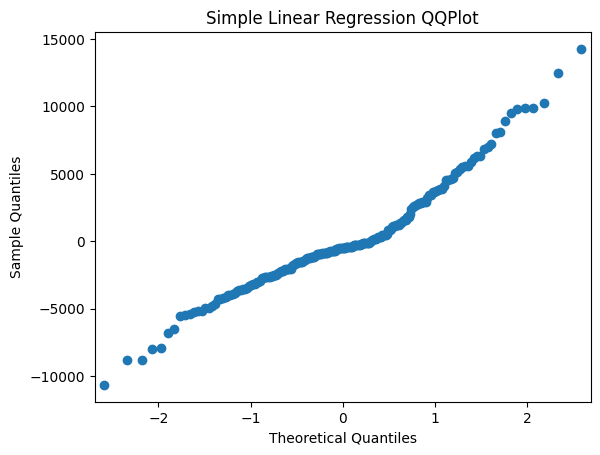

In [11]:
sm.qqplot(model.resid)
plt.title("Simple Linear Regression QQPlot")
plt.show()

In [12]:
# Multiple Regression Model
valid = df.select_dtypes(include=["int64", "float64"])
X = sm.add_constant(valid.drop(columns="price"))
Y = df["price"]

multiple_reg = sm.OLS(Y, X).fit()
print(multiple_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     78.05
Date:                Sat, 18 May 2024   Prob (F-statistic):           7.97e-71
Time:                        23:26:12   Log-Likelihood:                -1936.7
No. Observations:                 205   AIC:                             3903.
Df Residuals:                     190   BIC:                             3953.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.165e+04   1.57e+04  

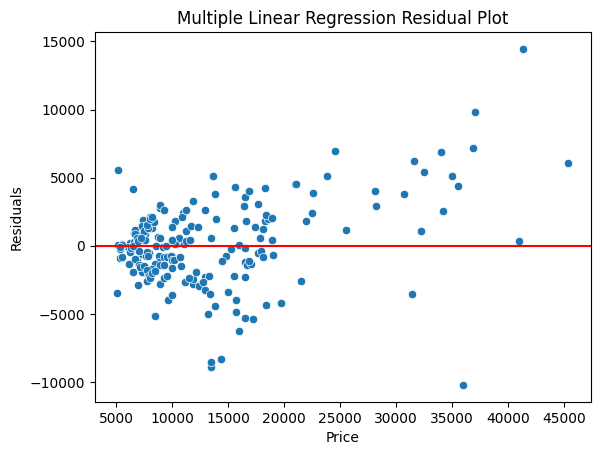

In [13]:
sns.scatterplot(x=df["price"], y=multiple_reg.resid)
plt.axhline(c='r')
plt.xlabel("Price")
plt.ylabel("Residuals")
plt.title("Multiple Linear Regression Residual Plot")
plt.show()

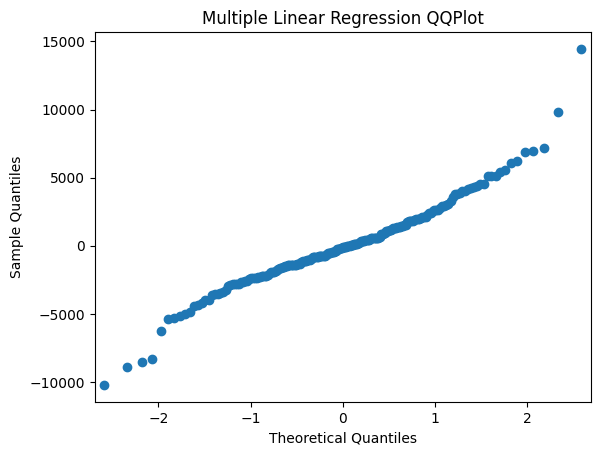

In [14]:
sm.qqplot(multiple_reg.resid)
plt.title("Multiple Linear Regression QQPlot")
plt.show()